In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
sns.set_context("talk", font_scale = 1.4)

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = 2
b = 2
X = np.linspace(0,1,4)[:,None]
X_prime = np.linspace(0,1,20)[:,None]
Y = scipy.stats.beta.pdf(X, a, b)

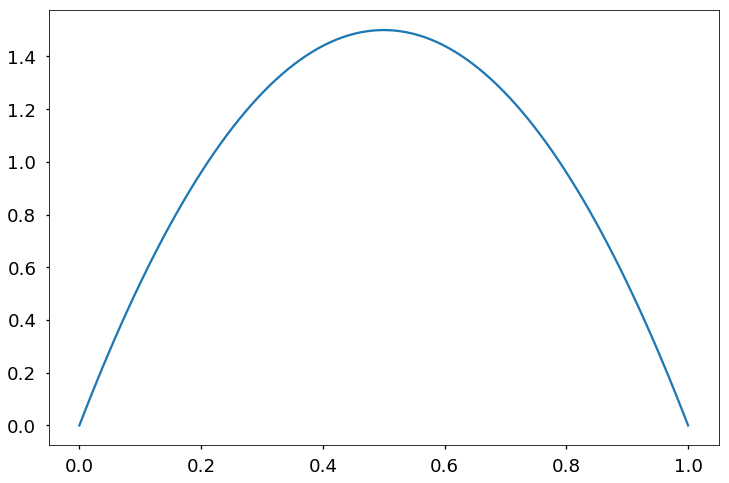

In [3]:
Xplot = np.linspace(0,1,100)[:,None]
Yplot = scipy.stats.beta.pdf(Xplot, a, b)
plt.figure(figsize = (12,8))
plt.plot(Xplot, Yplot)

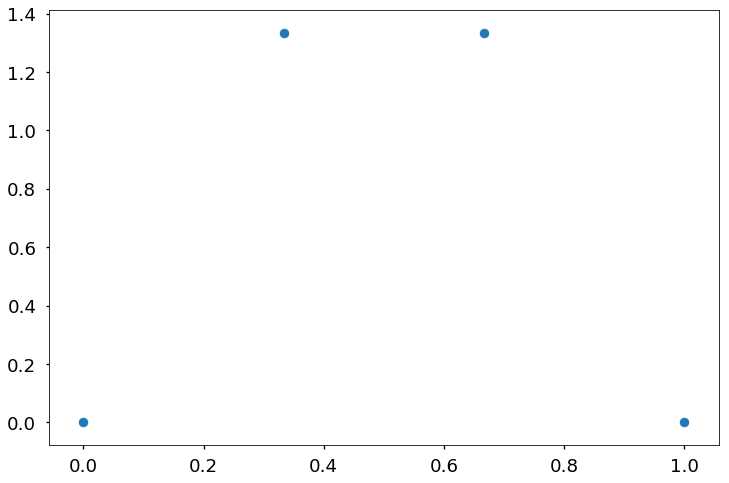

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(X, Y)

In [5]:
import sys
sys.path.append('../')
from GPFlowUnimodal.ker_w_der import ExtendRBF1D
from GPFlowUnimodal.unimodal_gpmc import UnimodalGPMC

In [6]:
m = UnimodalGPMC(X, Y, X_prime)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [7]:
m

Name,values,prior,constraint
unimodal_model.Vf,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.Vg,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.kern_f.lengthscale,[1.],None,+ve
unimodal_model.kern_f.signal_variance,[1.],None,+ve
unimodal_model.kern_g.lengthscale,[1.],None,+ve
unimodal_model.kern_g.signal_variance,[1.],None,+ve
unimodal_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [8]:
m.kern_f.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_f.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m.kern_g.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_g.signal_variance.prior = gpflow.priors.Gamma(1.,1.)

In [9]:
m.optimize(maxiter=150) # start near MAP

      fun: array([123.10584362])
 hess_inv: <68x68 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.60827736e+01, -3.66606595e+01, -3.79005316e+00,  5.20330395e+00,
       -9.72446648e-02,  9.90868507e-03,  1.22032188e-02,  1.42122265e-02,
        1.07137452e-02,  4.59784514e-03, -1.68104707e-03, -7.54080759e-03,
       -1.11571967e-02, -1.11298100e-02, -8.78806366e-03, -5.85922341e-03,
       -2.99771085e-03, -2.87248963e-04,  2.27751613e-03,  4.24610166e-03,
        4.62032734e-03,  3.42290974e-03,  1.89267342e-03,  7.89335294e-04,
        2.57420248e+00,  4.55863267e+00,  2.19485386e+00,  1.19915773e+00,
        6.57852822e-01,  5.35023341e-01,  4.90434982e-01,  3.99747139e-01,
        2.82541822e-01,  1.90042204e-01,  1.30604215e-01,  9.37510443e-02,
        6.87276154e-02,  4.93295059e-02,  3.35337722e-02,  2.13368487e-02,
        1.27127130e-02,  7.05648382e-03,  3.54078360e-03,  1.45719539e-03,
       -1.77133897e-04,  1.90690632e-04,  6.31914164e-05,  6.18573421e-06

In [10]:
samples = m.sample(1000, Lmax = 20, epsilon = 0.01, thin = 2, burn = 200, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  89.0 %
Iteration:  200 	 Acc Rate:  79.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  72.0 %
Iteration:  200 	 Acc Rate:  57.0 %
Iteration:  300 	 Acc Rate:  81.0 %
Iteration:  400 	 Acc Rate:  79.0 %
Iteration:  500 	 Acc Rate:  93.0 %
Iteration:  600 	 Acc Rate:  79.0 %
Iteration:  700 	 Acc Rate:  86.0 %
Iteration:  800 	 Acc Rate:  95.0 %
Iteration:  900 	 Acc Rate:  64.0 %
Iteration:  1000 	 Acc Rate:  67.0 %
Iteration:  1100 	 Acc Rate:  44.0 %
Iteration:  1200 	 Acc Rate:  56.0 %
Iteration:  1300 	 Acc Rate:  86.0 %
Iteration:  1400 	 Acc Rate:  88.0 %
Iteration:  1500 	 Acc Rate:  73.0 %
Iteration:  1600 	 Acc Rate:  84.0 %
Iteration:  1700 	 Acc Rate:  82.0 %
Iteration:  1800 	 Acc Rate:  77.0 %
Iteration:  1900 	 Acc Rate:  79.0 %
Iteration:  2000 	 Acc Rate:  88.0 %


In [11]:
#plt.figure(figsize=(16, 4))
#plt.plot(samples)

In [12]:
sample_df = m.get_samples_df(samples)
sample_df.head()

,unimodal_model.Vf,unimodal_model.Vg,unimodal_model.kern_f.lengthscale,unimodal_model.kern_f.signal_variance,unimodal_model.kern_g.lengthscale,unimodal_model.kern_g.signal_variance,unimodal_model.likelihood.noise_variance
0,"[[0.01992484986415742], [1.401686470999541], [...","[[1.2143907781752263], [-0.448175632571534], [...",[0.2784074415428685],[0.9055739120942782],[0.3530177595449003],[0.6316804389793186],[0.01]
1,"[[0.06397088028976641], [1.362345980103815], [...","[[1.2183581201607991], [-0.4535927621893762], ...",[0.28924422719880044],[0.9955986277390315],[0.3410735552218565],[0.6307933460726399],[0.01]
2,"[[0.049081769193076004], [1.3944625635161754],...","[[1.1043176656110008], [-0.7328395662785536], ...",[0.2871121832304369],[1.2029105688048778],[0.33033160801178263],[0.6030629215868446],[0.01]
3,"[[0.056036472941387375], [1.4657586414456965],...","[[1.6905524104575473], [-0.5356771569115424], ...",[0.30964171963265663],[1.2058041909787567],[0.2831102534180914],[0.8256220647971578],[0.01]
4,"[[0.08772467553998642], [1.5396098103288973], ...","[[1.6919892111937245], [-0.6450076029086484], ...",[0.3284687059910627],[1.2459610851724832],[0.26089839143099813],[0.8339906978044903],[0.01]


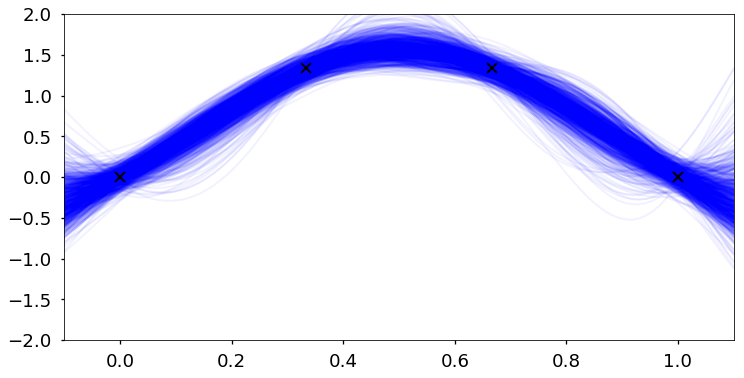

In [13]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 20)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-2, 2)

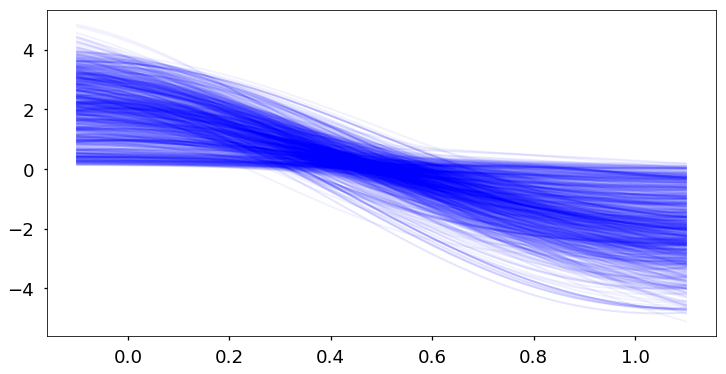

In [14]:
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, g[0,:,:], 'b', lw=2, alpha = 0.05)

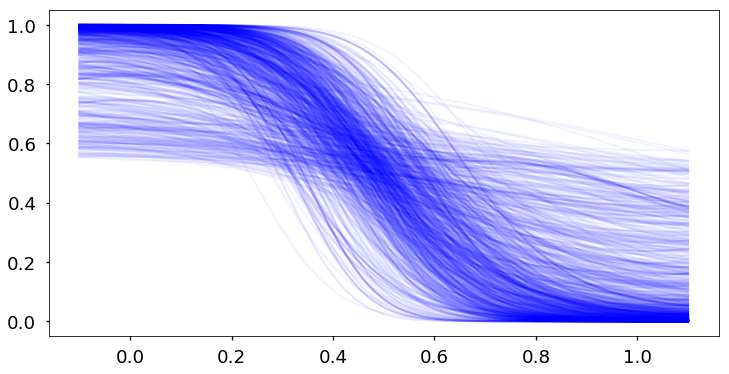

In [41]:
from scipy.stats import norm
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 1)
    plt.plot(xx, norm.cdf(g[0,:,:]), 'b', lw=2, alpha = 0.05)

In [16]:
meanmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
varmat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean, v = m.predict_f(xx)
    var = v[:,:,0]
    meanmat[i,:] = mean[:,0]
    varmat[i,:] = np.diag(var)

In [36]:
def visualize_utility(Xgrid, Mgrid, Vargrid):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Stdgrid = np.sqrt(Vargrid)
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    #plt.figure(figsize=(12,8))
    #plt.plot(Xgrid[:,0], lower, 'g')
    #plt.plot(Xgrid[:,0], upper, 'r')
    #plt.plot(Xgrid[:,0], Mgrid, 'b')
    
    line, = plt.plot(Xgrid, Mgrid, lw = 2)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = line.get_color(), alpha = 0.25)
    plt.xlabel('Temperature degC')
    plt.ylabel('Utility')
    plt.title('Utility at different temp values')
    return

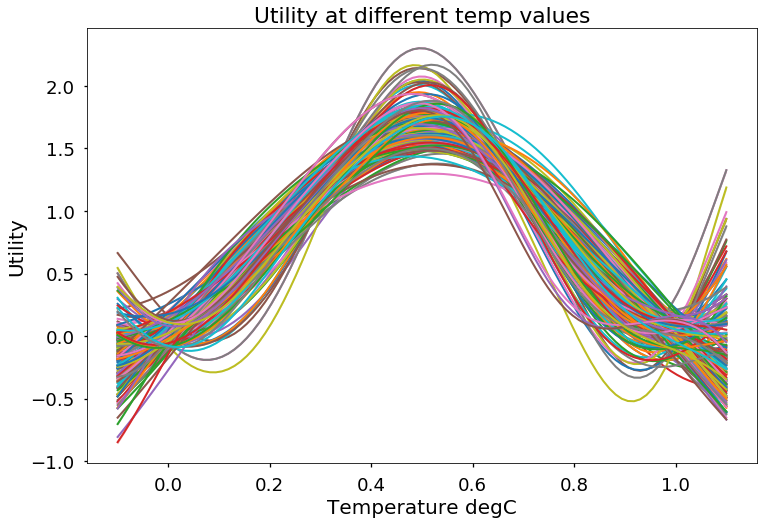

In [38]:
plt.figure(figsize=(12,8))
for i in xrange(200):
    visualize_utility(xx, meanmat[i,:], varmat[i,:])

In [39]:
g[0,:,:].shape

(100, 1)

In [40]:
g.shape

(200, 100, 1)

In [45]:
m.set_state(samples[i,:])

68

In [44]:
samples.shape

(1000, 68)